In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format


In [2]:
# Preparar request de cotizaciones históricas
klines = "https://api.binance.com/api/v3/klines"

base_asset = "BTC"
price_asset = "BUSD"
interval = "1d"

symbol = base_asset+price_asset

klines_request = klines+"?symbol="+symbol+"&interval="+interval

In [3]:
# Consultar y leer en JSON
respuesta = requests.get(klines_request)

jsondata = json.loads(respuesta.text)

In [4]:
# Convertir json en pandas df
df = pd.DataFrame.from_dict(jsondata)

# Acomodar df de acuerdo al JSON recibido
df.rename(columns={
    0: "Date", 
    1: "Open price", 
    2: "High price", 
    3: "Low price", 
    4: "Close price",
    5: "Volume",
    7: "Quote asset volume",
    8: "Number of trades",
    9: "Taker buy base asset volume",
    10: "Taker buy quote asset volume"}, 
    inplace=True)
df.drop(axis=1, columns=[6,11], inplace=True)

df = df.apply(pd.to_numeric)
df["Date"] = pd.to_datetime((df["Date"]/1000), unit="s")

df.head()

,Date,Open price,High price,Low price,Close price,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2021-07-09,32872.07,34100.00,32272.17,33816.26,12803.63,424372552.54,303609,6728.78,223160739.84
1,2021-07-10,33816.26,34258.39,33025.01,33500.22,11966.55,403478066.42,254385,5934.86,200178530.88
2,2021-07-11,33500.22,34613.21,33310.22,34259.99,9968.94,337557944.21,244856,5451.79,184559747.24
3,2021-07-12,34260.00,34671.94,32660.21,33091.54,13935.48,468082046.61,320364,6787.65,228045415.16
4,2021-07-13,33086.72,33339.72,32200.74,32729.46,11023.44,361582725.42,296620,5306.37,174150732.58


[Text(0.5, 1.0, 'BTC Price'), Text(0, 0.5, 'BUSD')]

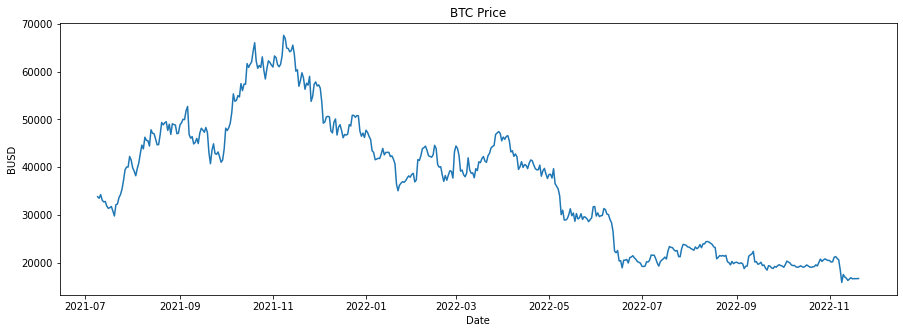

In [5]:
fig, ax = plt.subplots(figsize=[15,5])
sns.lineplot(y=df["Close price"], x=df["Date"]).set(title=base_asset+" Price", ylabel=price_asset)